# Exploratory Data Analysis (EDA) for Diamonds Market
## Yijun Yang, Brenna Yin, Ting Ye

In [1]:
import pandas_alive as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the raw diamonds data 
raw_data = pd.read_csv("diamonds.csv")

In [3]:
#see the first several lines of data
raw_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1. Introduction

This is a dataset contains the prices and other attributes of almost 54,000 diamonds in the real market. 

We obtained the data set from:

https://www.kaggle.com/shivam2503/diamonds

### 1.1 What are the features?
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

## 2. Cleaning the data

In [4]:
#drop the column with duplicate index
diamonds = raw_data.drop(columns = ['Unnamed: 0'])
diamonds.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# add a column named volumn
diamonds["volumn"] = diamonds["x"] * diamonds["y"] * diamonds["z"]
diamonds.sort_values(by = 'volumn')

diamonds = diamonds.drop(index = 24067) #drop the diamond with an extreme large volumn. 
diamonds = diamonds[diamonds.volumn != 0] #drop the diamond with 0.00 volumn 
diamonds = diamonds.drop(index = 24932) # drop the diamond with an extreme large table value

## 3. Classify the Data

### 3.1by price range

In [6]:
#create new column price_range as 1st, 2nd, 3rd

diamonds.loc[(diamonds['price'] <  2700) ,'price_range'] = '1st'
diamonds.loc[(diamonds['price'] >=  2700) & (diamonds['price'] <  7500) ,'price_range'] = '2nd'
diamonds.loc[(diamonds['price'] >=  7500) ,'price_range'] = '3rd'


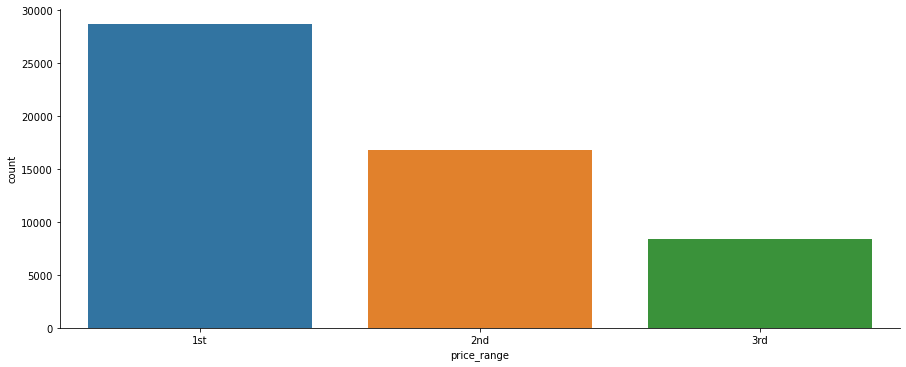

In [7]:
#hist price_range
sns.catplot(x='price_range', data=diamonds , kind='count',aspect=2.5 )

In [8]:
# price % in price_range

df = diamonds
range_1st = df[df['price_range'] == '1st']['price'].count()  / df['price'].count()
range_2nd = df[df['price_range'] == '2nd']['price'].count()  / df['price'].count()
range_3rd = df[df['price_range'] == '3rd']['price'].count()  / df['price'].count()

print("1st:{:.2%}, 2nd:{:.2%}, 3rd:{:.2%}".format(range_1st,range_2nd,range_3rd))

1st:53.22%, 2nd:31.25%, 3rd:15.53%


### 3.2 by carat

[]

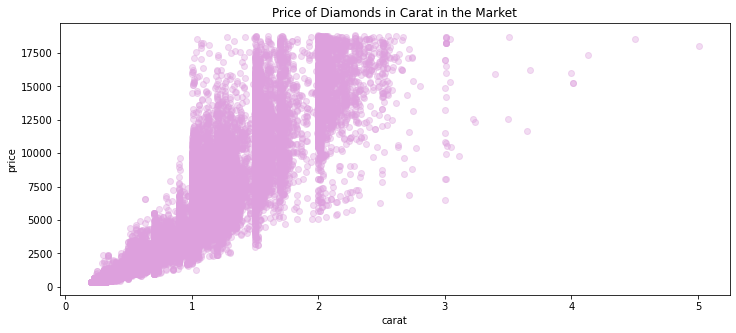

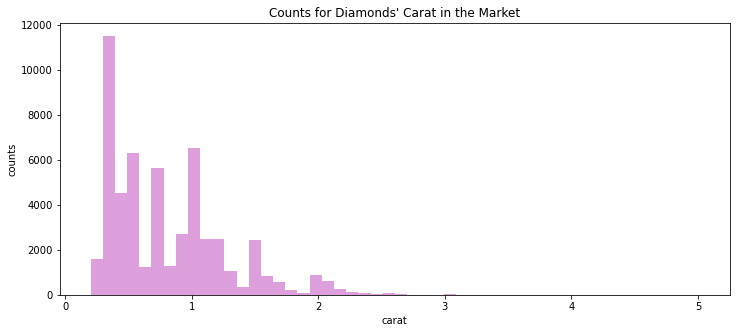

In [9]:
plt.figure(figsize=(12,5))


plt.scatter(diamonds["carat"], diamonds['price'],alpha = 0.37, color = 'plum')
plt.xlabel("carat")
plt.ylabel("price")
plt.title("Price of Diamonds in Carat in the Market")
plt.plot()


plt.figure(figsize=(12,5))
plt.hist(diamonds["carat"], 50, color = 'plum') 
plt.xlabel("carat")
plt.ylabel("counts")
plt.title("Counts for Diamonds' Carat in the Market")
plt.plot()



In [10]:
# count the numebr of diamonds by the seperation line in carat = 3.0
diamonds["carat"] = diamonds['carat'].astype(np.float16)

print(diamonds["carat"][diamonds["carat"] <= 3.0].count())
print(diamonds["carat"][diamonds["carat"] >3.0].count())

53886
32


### 3.3 by cut

Text(0.5, 1.0, 'frequency distribution for different cut')

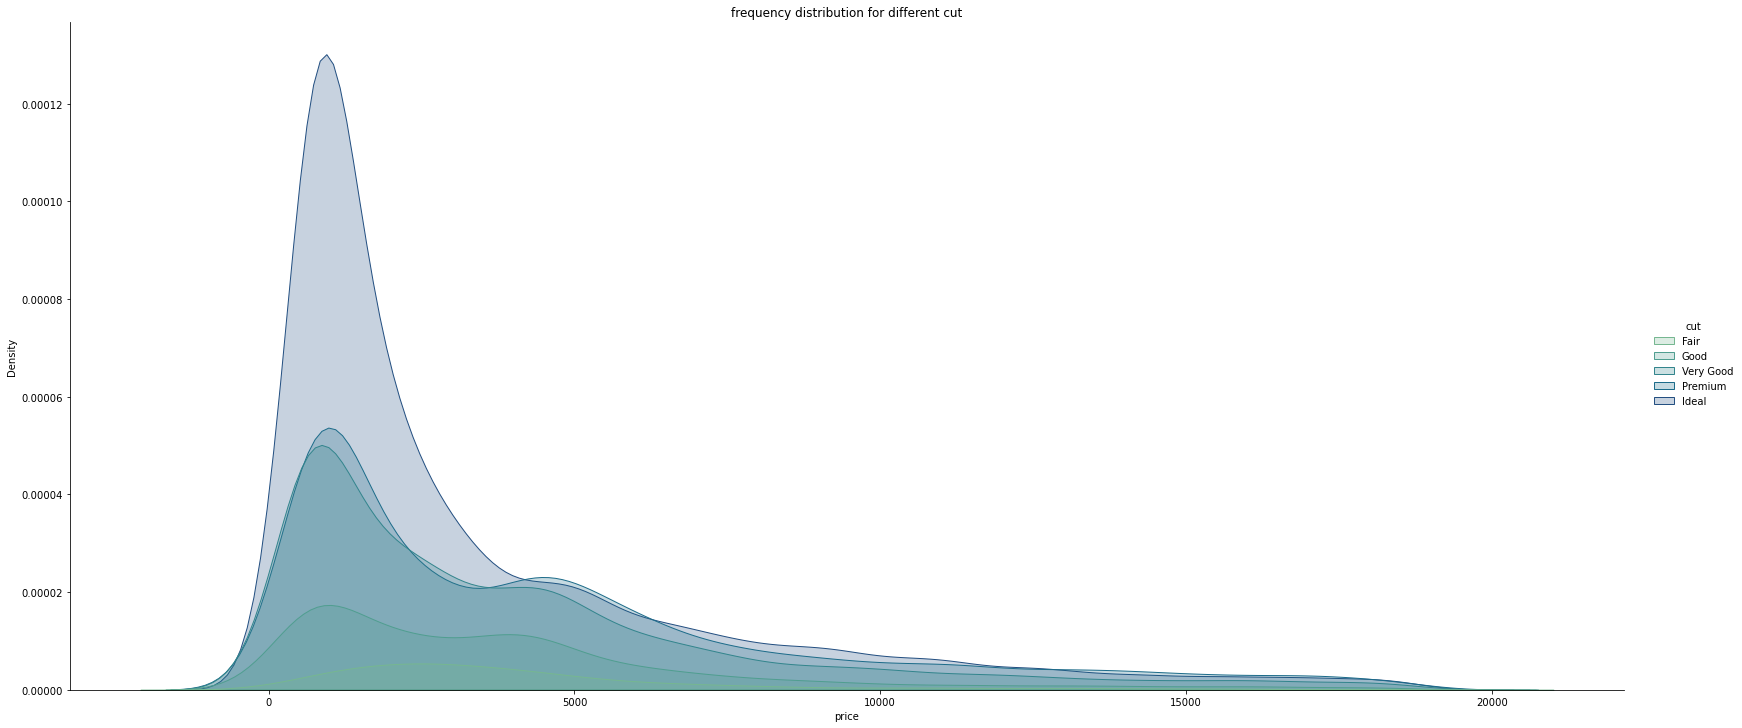

In [11]:
pic_1 = sns.displot(diamonds, x="price", hue="cut", hue_order = ["Fair","Good","Very Good","Premium","Ideal"],
            kind="kde",height=10, aspect = 2.3, palette = "crest",fill=True)
plt.title("frequency distribution for different cut")

### 3.4 by clarity

Text(0.5, 1.0, 'frequency distribution for different clarity')

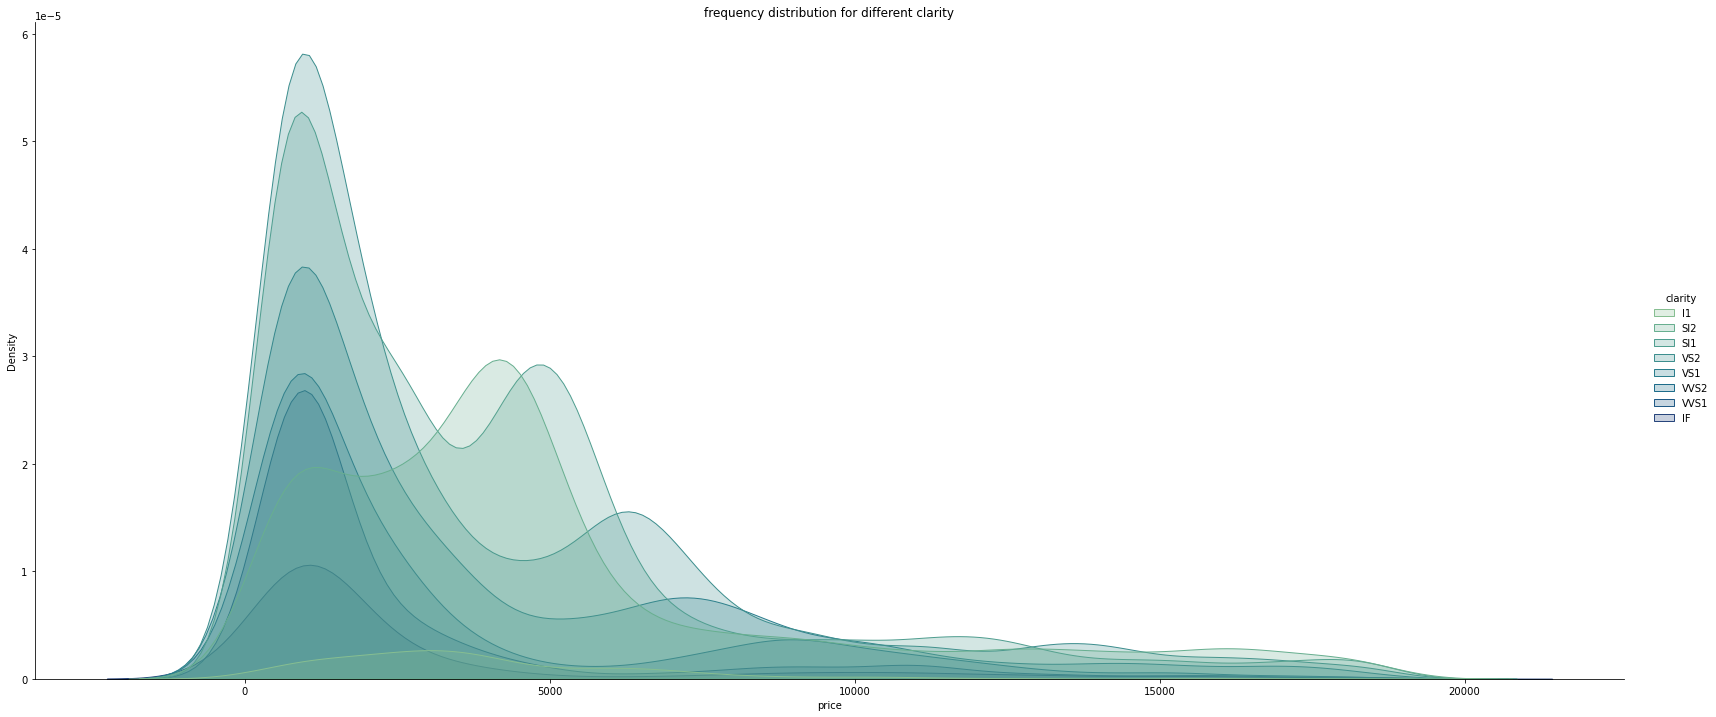

In [12]:
sns.displot(diamonds, x="price", hue="clarity",hue_order = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"],
                                                            kind="kde",height=10, aspect = 2.3,palette = "crest",fill=True)
plt.title("frequency distribution for different clarity")

### 3.5 by color

Text(0.5, 1.0, 'frequency distribution for different color')

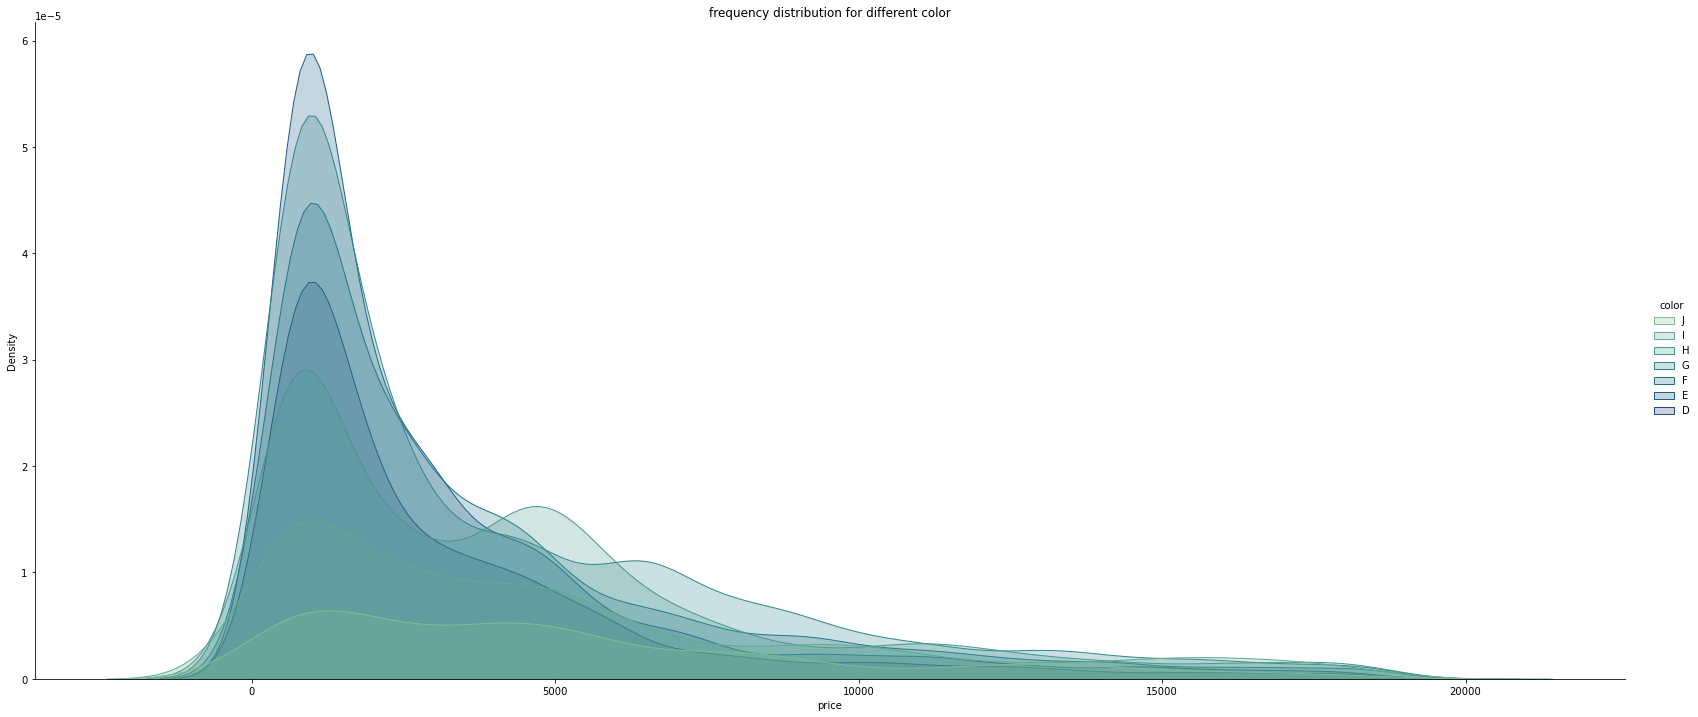

In [13]:
sns.displot(diamonds, x="price", hue="color",hue_order = ["J","I","H","G","F","E","D"], kind="kde",
           height=10, aspect = 2.3, palette = "crest",fill=True)
plt.title("frequency distribution for different color")

## 4. What does the real market look like

### 4.1 The distribution of numeric variables

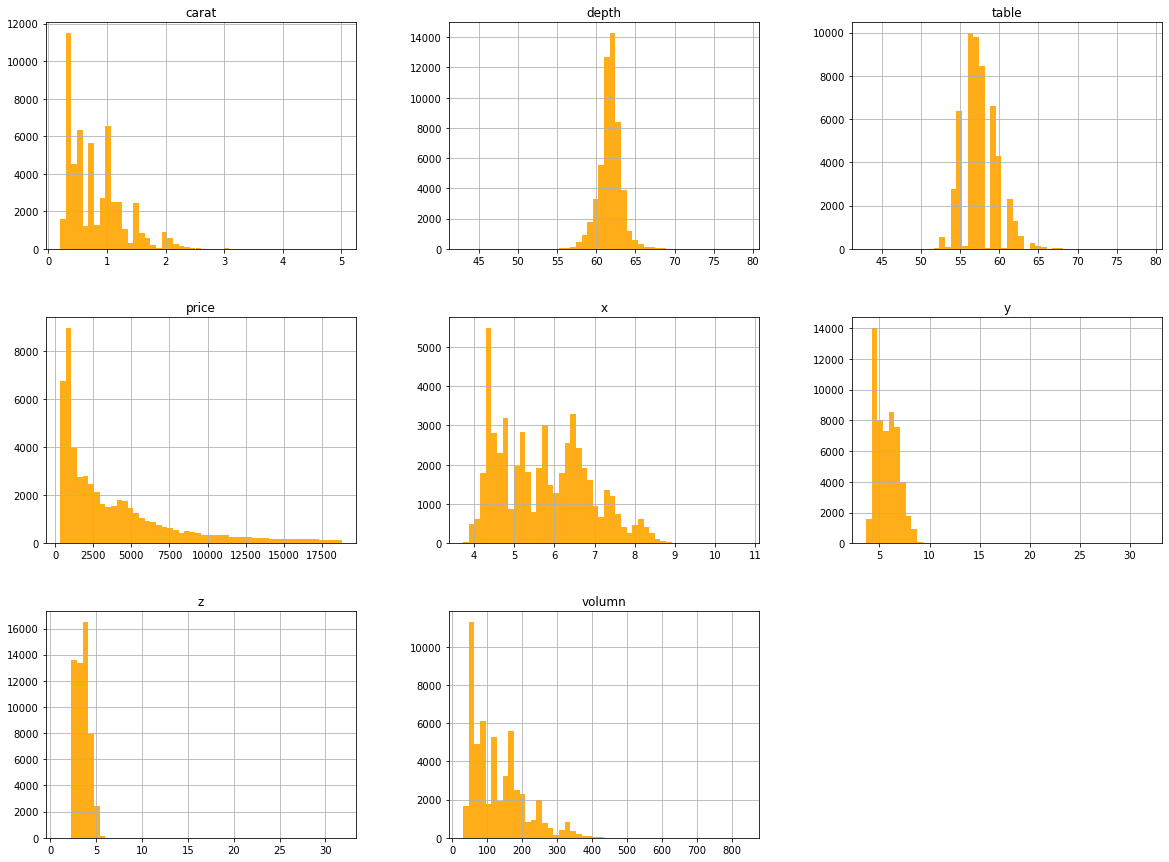

In [14]:
diamonds.hist(bins=50,figsize=(20,15),color = "orange", alpha = 0.9)
plt.show()

### 4.2 The relationship among all the features

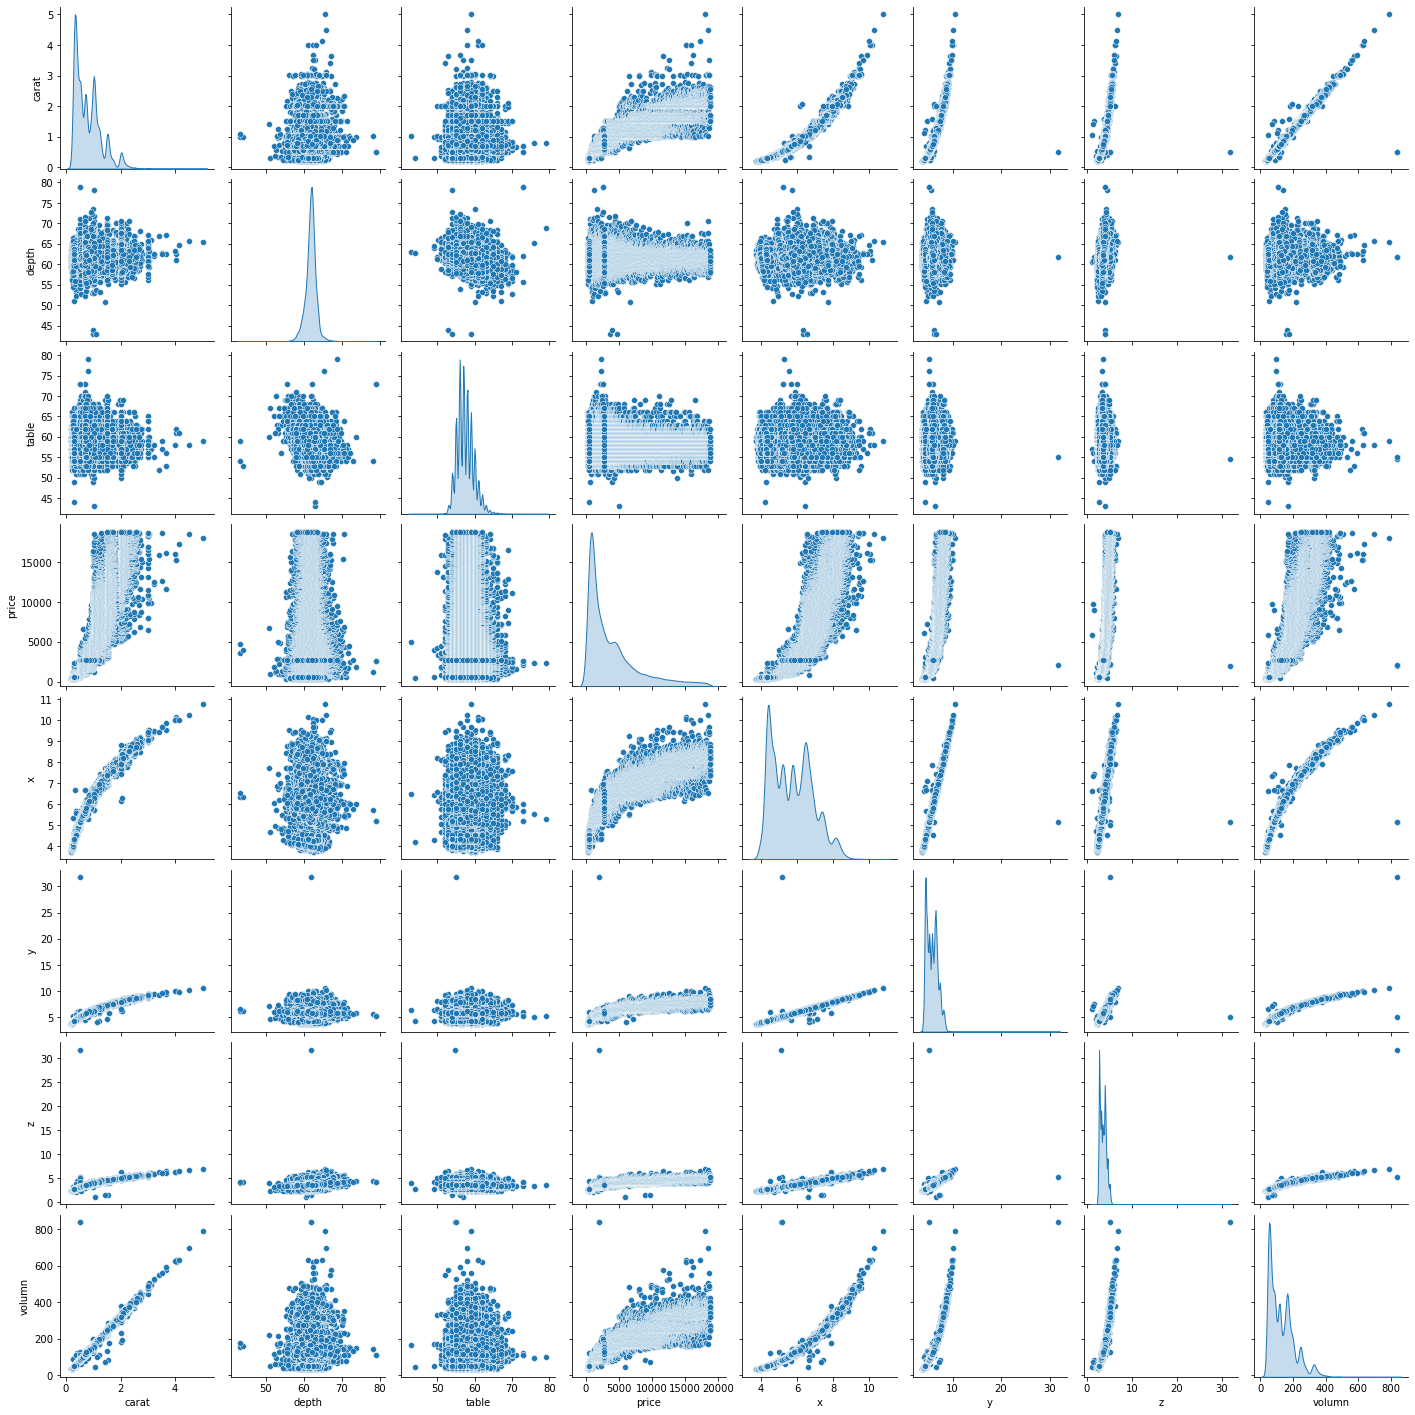

In [15]:
sns.pairplot(diamonds , diag_kind = 'kde')

## 5. Detailed Analysis for select features

### 5.1 Carat, Price, Cut

Text(0.5, 1.0, 'diamonds for different cut')

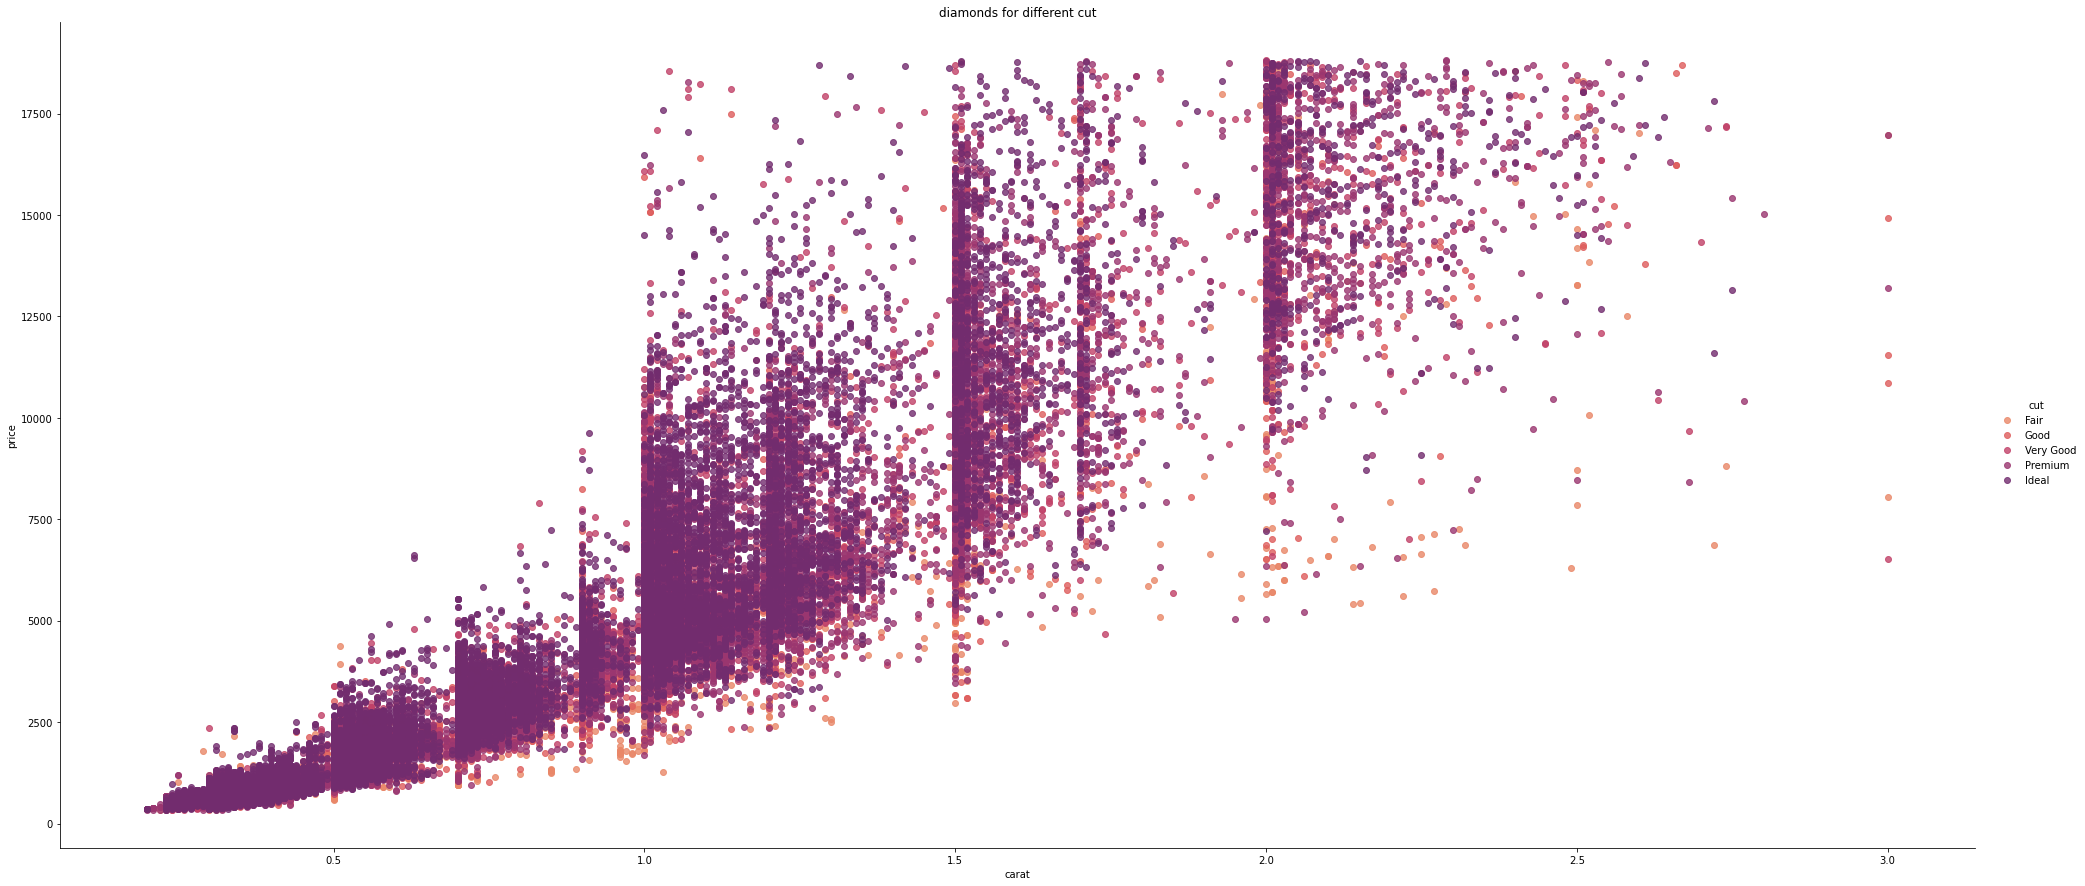

In [16]:
#plot the data points for different ranks of cut
reduce_diamonds = diamonds[diamonds.carat <= 3.00]
sns.lmplot(x = 'carat', y = 'price', data = reduce_diamonds,
           palette = "flare",
           hue= 'cut' , 
           hue_order = ["Fair","Good","Very Good","Premium","Ideal"],
           fit_reg=False,
           height=12, aspect = 2.3)
plt.title("diamonds for different cut")

Text(0.5, 1.0, 'diamonds for different cut')

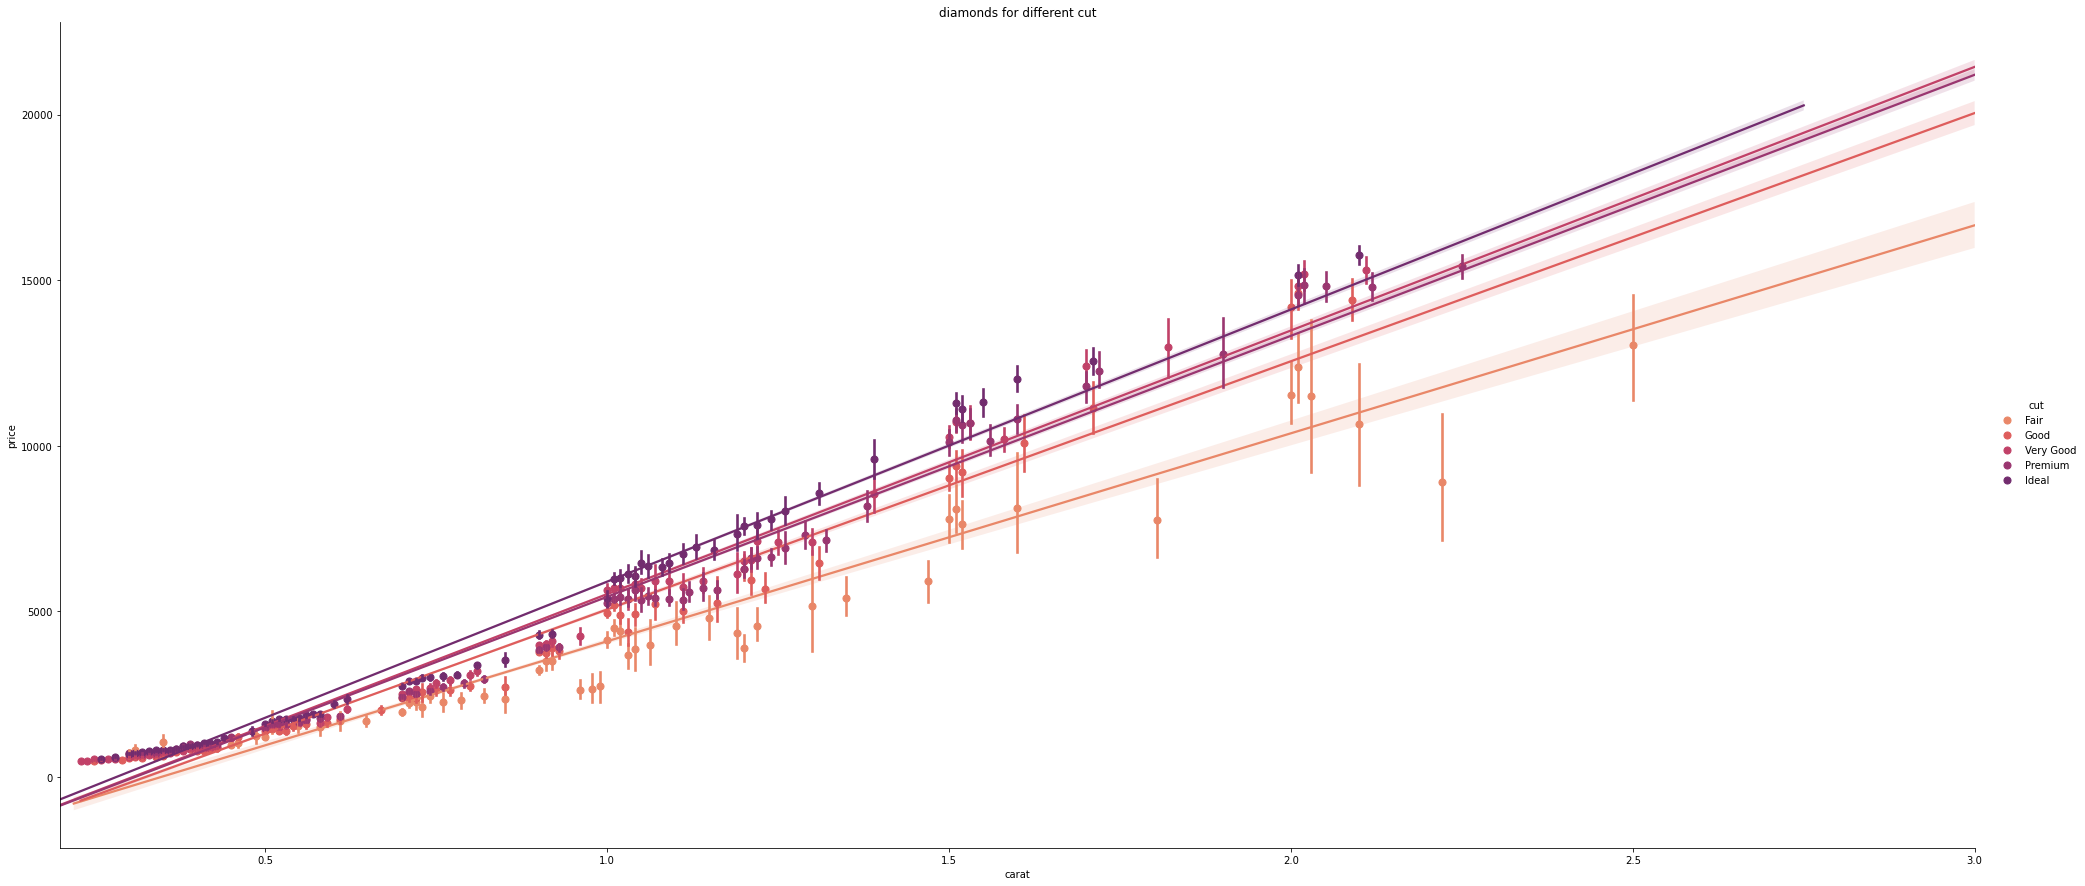

In [17]:
#plot the simple linear regression line for differnet cut
# seperate the carat into 100 descrete bins
reduce_diamonds = diamonds[diamonds.carat <= 3.00]
cut = sns.lmplot(x = 'carat', y = 'price', data = reduce_diamonds,
           palette = "flare",
           hue= 'cut' , 
           hue_order = ["Fair","Good","Very Good","Premium","Ideal"],
           x_bins = 100,
           #fit_reg=False,
           height=12, aspect = 2.3)

plt.title("diamonds for different cut")


### 5.2 Carat, Price, Color

Text(0.5, 1.0, 'diamonds for different color')

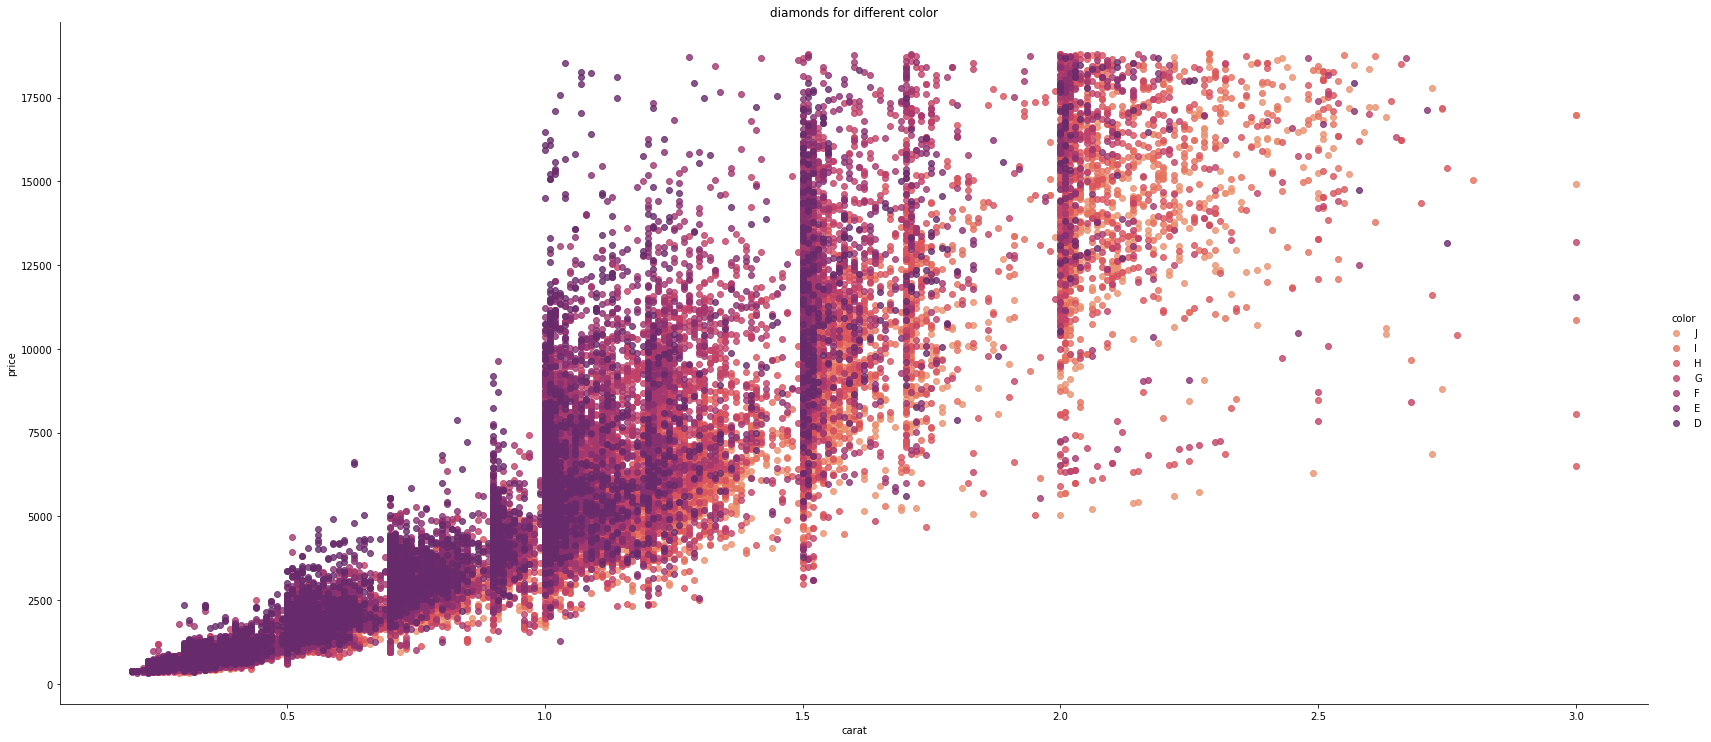

In [18]:
#plot the data points for different ranks of color
reduce_diamonds = diamonds[diamonds.carat <= 3.00]
sns.lmplot(x= 'carat', y = 'price', data = reduce_diamonds,
           palette = "flare",
           hue='color', hue_order = ["J","I","H","G","F","E","D"],
           fit_reg=False,
           height=10, aspect = 2.3)

plt.title("diamonds for different color")

Text(0.5, 1.0, 'diamonds for different color')

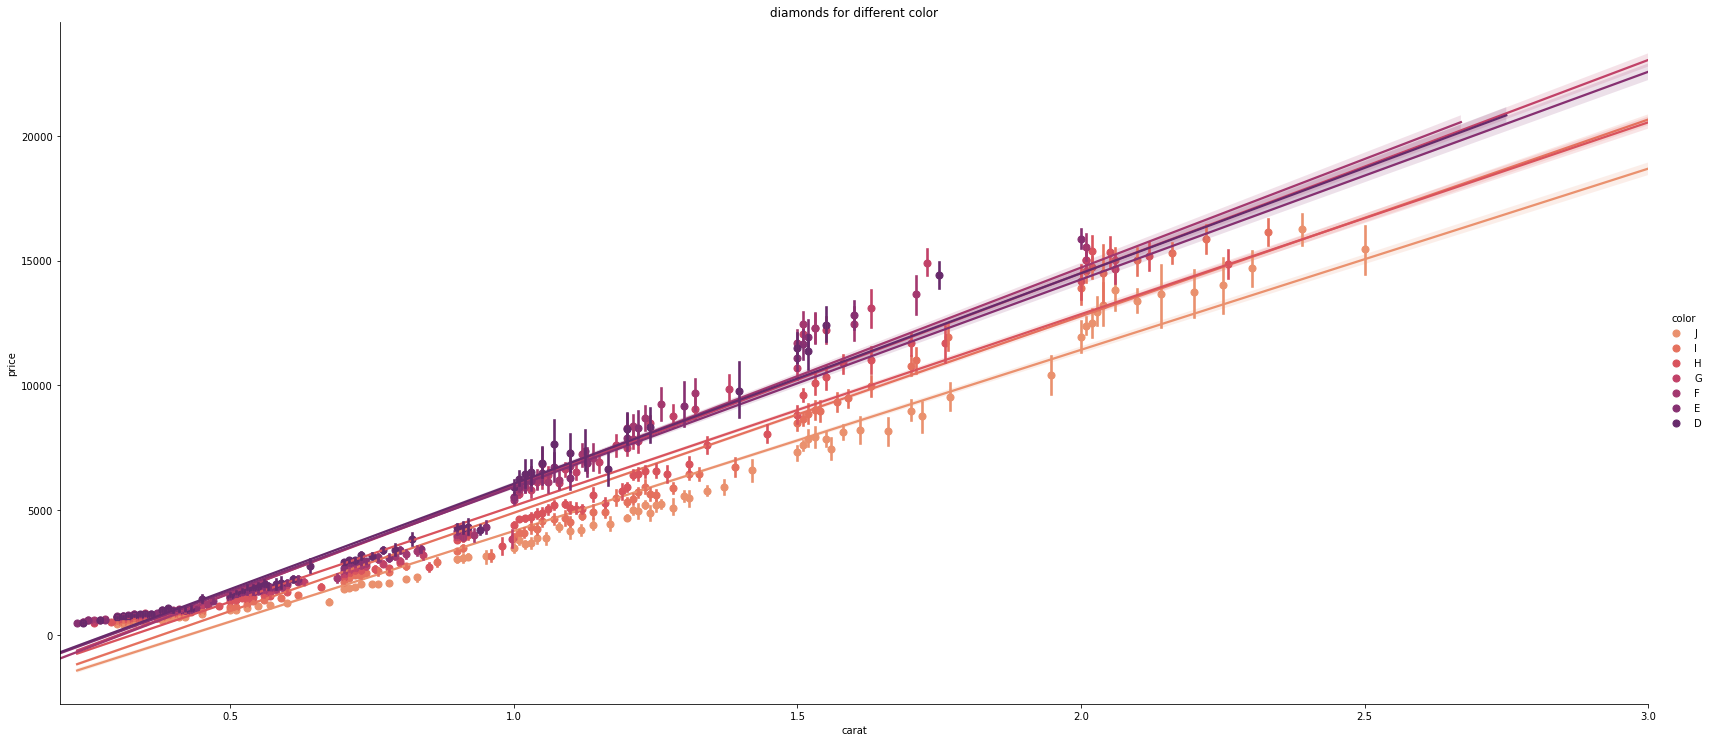

In [19]:
#plot the simple linear regression line for differnet color
# seperate the carat into 100 descrete bins
sns.lmplot(x= 'carat', y = 'price', data = reduce_diamonds,
           palette = "flare",
           hue='color', hue_order = ["J","I","H","G","F","E","D"],
           x_bins = 100,
           #fit_reg=False,
           height=10, aspect = 2.3)

plt.title("diamonds for different color")

### 5.3 Carat, Price, Clarity

Text(0.5, 1.0, 'diamonds for different clarity')

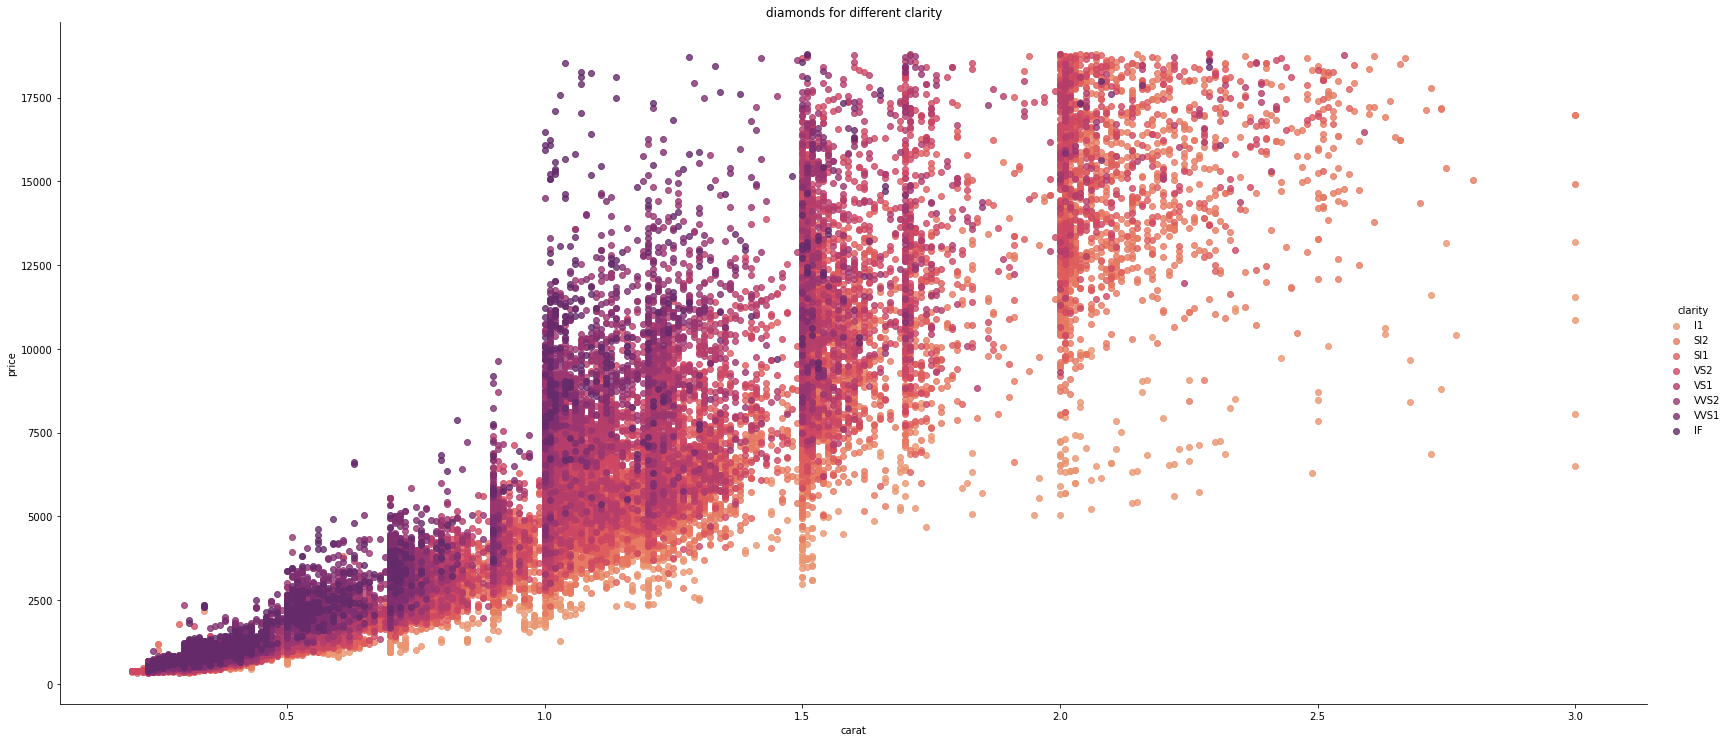

In [20]:
#plot the data points for different ranks of clarity
reduce_diamonds = diamonds[diamonds.carat <= 3.00]
sns.lmplot(x ='carat', y ='price', data = reduce_diamonds, 
           palette = "flare",
           hue='clarity',hue_order = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"],
           fit_reg=False,
           height=10, aspect = 2.3)

plt.title("diamonds for different clarity")

Text(0.5, 1.0, 'diamonds for different clarity')

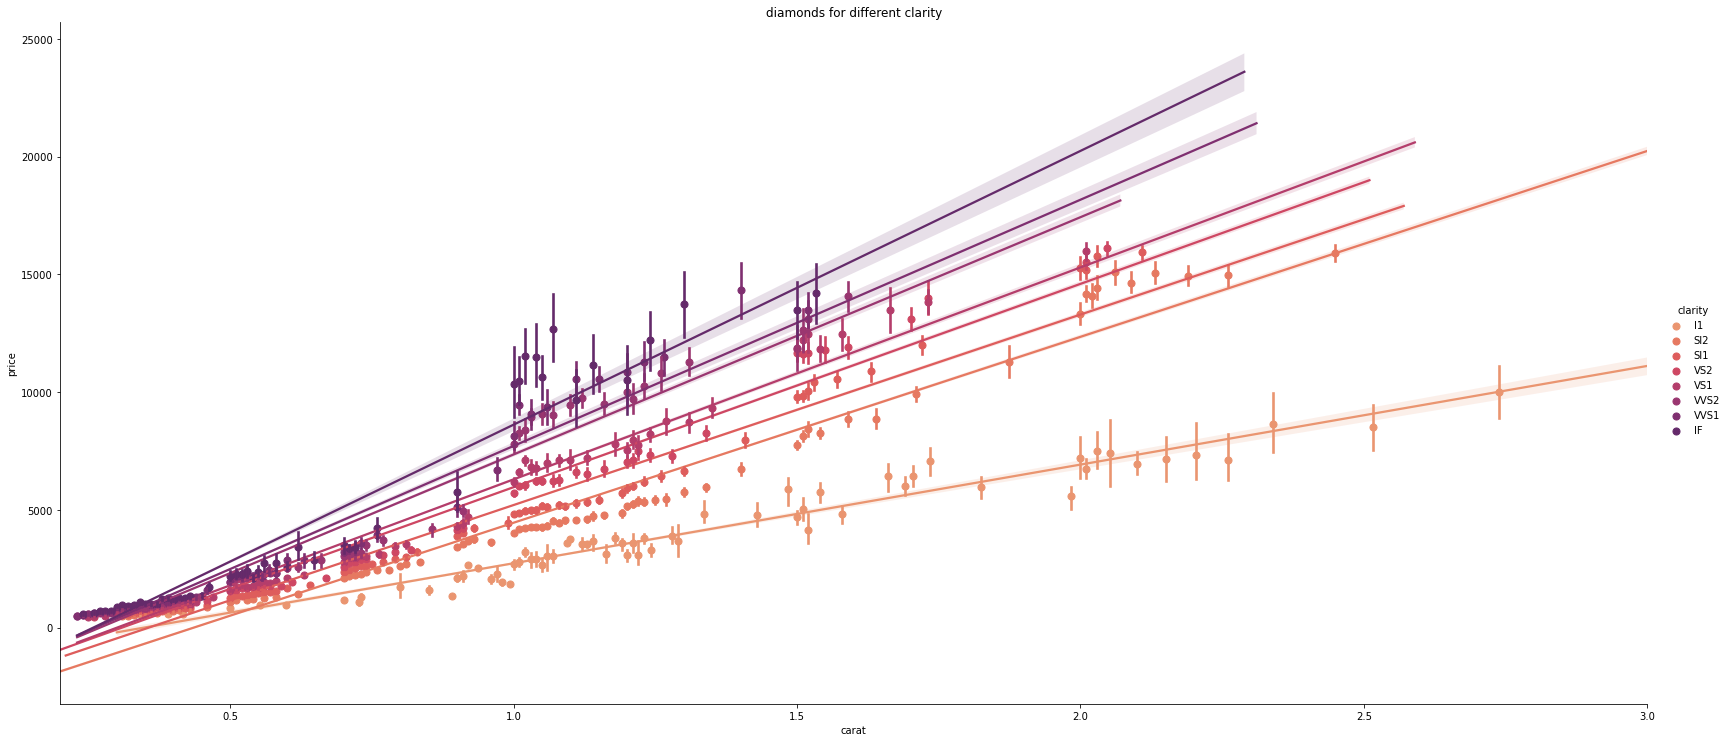

In [21]:
#plot the simple linear regression line for differnet clarity
# seperate the carat into 100 descrete bins
sns.lmplot(x ='carat', y ='price', data = reduce_diamonds, 
           palette = "flare",
           hue='clarity',hue_order = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"],
           x_bins = 100,
           #fit_reg=False,
           height=10, aspect = 2.3)

plt.title("diamonds for different clarity")

### 5.4 Price, Depth, Table

In [22]:
# choose the diamonds that shares the same quality.
test1 = diamonds[(diamonds['color']=='G') & (diamonds['clarity']=='SI1') & (diamonds['cut'] == 'Ideal')]

#see how many are they
len(test1)

660

In [23]:
#create a column as unit price based on the price and the carat
test1['unit_price'] = test1['price'] / test1['carat']

<ipython-input-23-df92a8b14239>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['unit_price'] = test1['price'] / test1['carat']


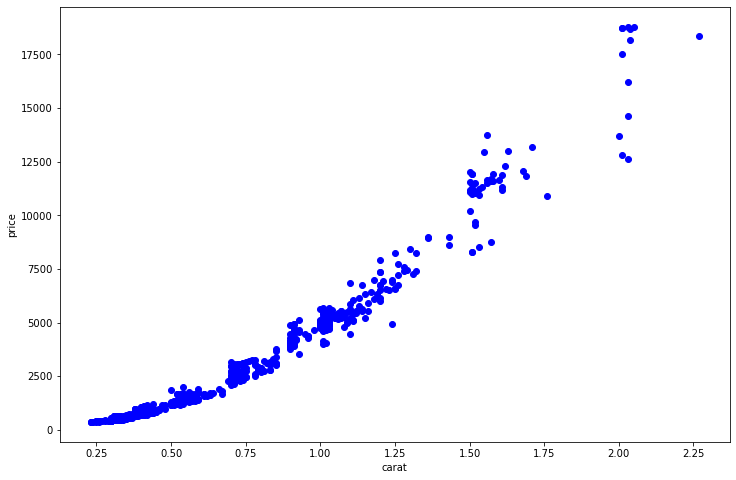

In [24]:
#plot the disctibution for those 660 ponints
plt.figure(figsize = (12,8))
plt.scatter(test1.carat, test1.price, color = 'blue')
plt.xlabel("carat")
plt.ylabel("price")
plt.show()

In [25]:
import altair as alt
#show hoq the depth and table affect the unit price 
source = test1

alt.Chart(source).mark_rect().encode(
    alt.X('table', bin=alt.Bin(maxbins=10)),
    alt.Y('depth', bin=alt.Bin(maxbins=20)),
    alt.Color('unit_price', scale=alt.Scale(scheme='yellowgreenblue'))
)

alt.Chart(...)